In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
rawData = pd.read_csv('./python/data/train.csv')

# 타이타닉 시각화

## 결측치 확인

<AxesSubplot:>

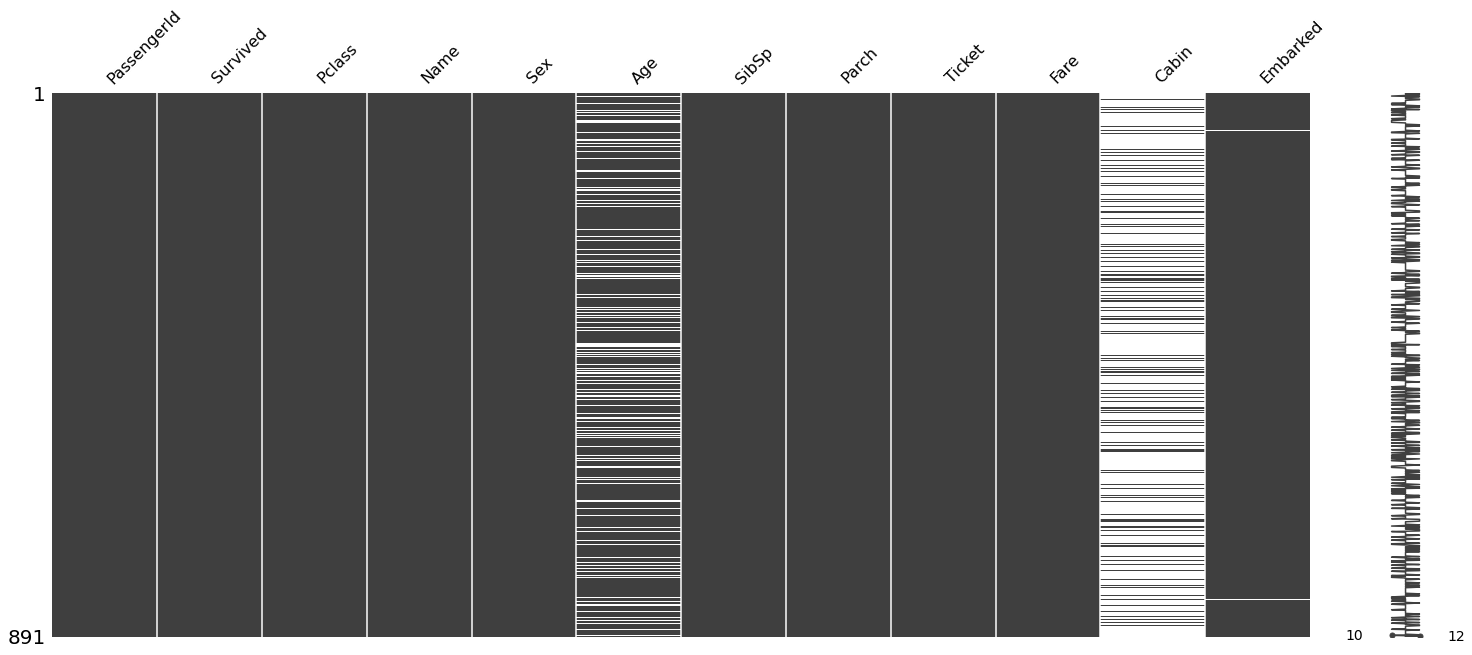

In [3]:
missingno.matrix(rawData)

## 상관계수
- 공분산

In [4]:
rawData.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


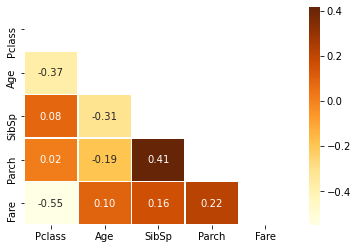

In [5]:
cor = rawData[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    cor, annot=True, fmt='.2f', cmap='YlOrBr', mask=mask, linewidths=0.5
)
plt.show()

### 변수
 - machine learning: Feature
 - 통계적 모형: 변수(variable)
 - X: 입력변수, 확률변수, 독립변수, 설명변수
 - Y: 출력변수, 종속변수, 정답(label)

# Y에 미치는 영향

In [6]:
rawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 생존자 정보 확인

0    549
1    342
Name: Survived, dtype: int64

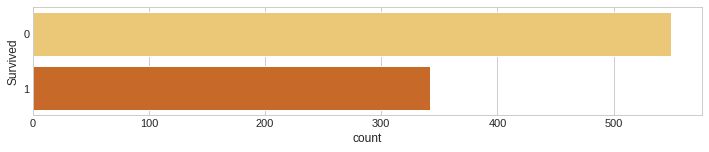

In [33]:
plt.style.use('seaborn-whitegrid')
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,2))
display(rawData.Survived.value_counts())
# sns.countplot(x='Survived', data=rawData)
sns.countplot(y='Survived', data=rawData, palette='YlOrBr')
plt.show()

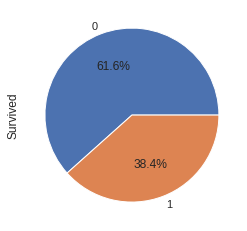

In [38]:
rawData.Survived.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

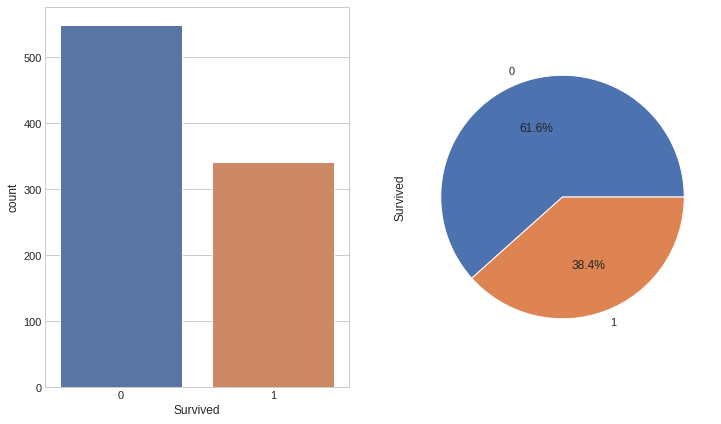

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.countplot(x='Survived', data=rawData, ax=ax[0])
rawData.Survived.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
plt.show()

## Pclass가 생존에 미치는 영향
- 높은 등급의 클래스 일수록 생존에 유리하지 않았을까?
- 숫자가 낮을수록 높은 등급
- 순위형 변수(범주형 이지만, 순서를 가지고 있는)

In [49]:
rawData.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [42]:
pd.crosstab(rawData.Pclass, rawData.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


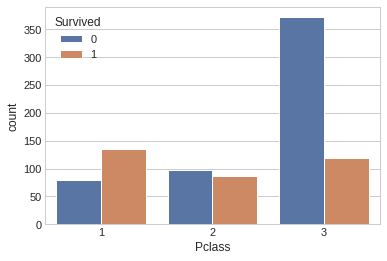

In [47]:
sns.countplot('Pclass', hue='Survived', data=rawData)
plt.show()

In [50]:
rawData.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

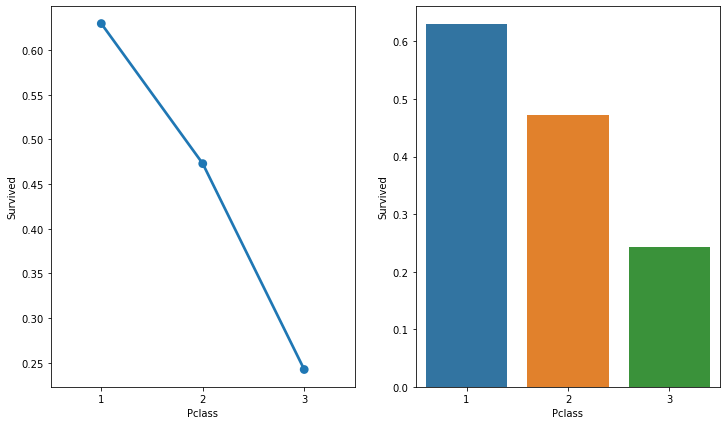

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.pointplot(x='Pclass', y='Survived', data=rawData, ax=ax[0], ci=None)
sns.barplot(x='Pclass', y='Survived', data=rawData, ax=ax[1], ci=None)
plt.show()

- 등급이 높을수록 생존에 유리했음을 알 수 있다. 

## 성별 생존여부

In [55]:
rawData.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [57]:
pd.crosstab(rawData.Sex, rawData.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


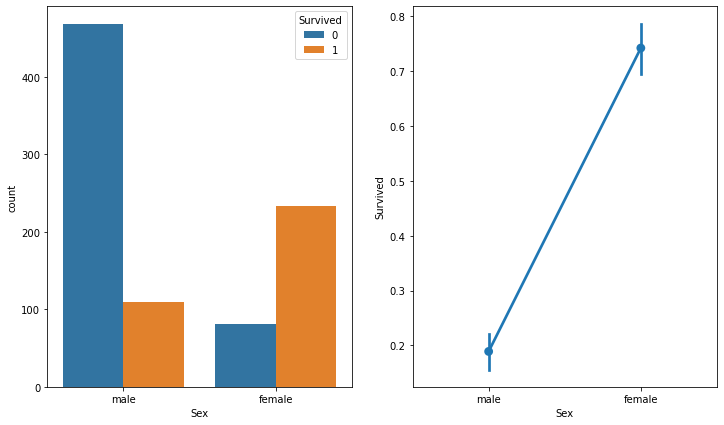

In [9]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot('Sex', hue='Survived', data=rawData)

plt.subplot(1,2,2)
sns.pointplot(x='Sex', y='Survived', data=rawData)
plt.show()

## 나이에 따른 생존여부
- 나이가 어린(1세 이하) 승객들은 성별과 상관없이 생존율이 높지 않았을까?

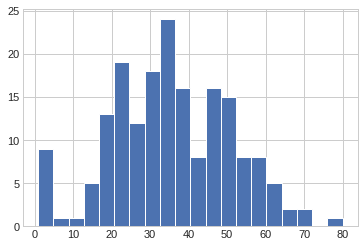

In [64]:
plt.hist('Age', data=rawData.dropna(), bins=20)
plt.show()

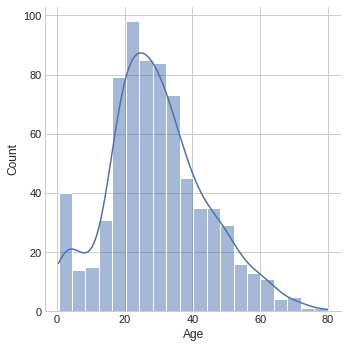

In [68]:
sns.displot(rawData['Age'].dropna(), bins=20, kde=True)
plt.show()

### 나이대별 생존자의 분포

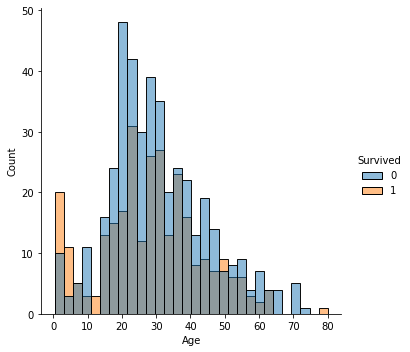

In [24]:
# sns.distplot(rawData[rawData['Survived'] == 1].Age, bins=20, label='Survived', kde=False)
# sns.distplot(rawData[rawData['Survived'] == 0].Age, bins=20, label='Not Survived', kde=False)
# plt.legend()
sns.displot(data=rawData, x='Age', hue='Survived', bins=30, al)
# sns.histplot(data=rawData, x='Age', hue='Survived')
plt.show()

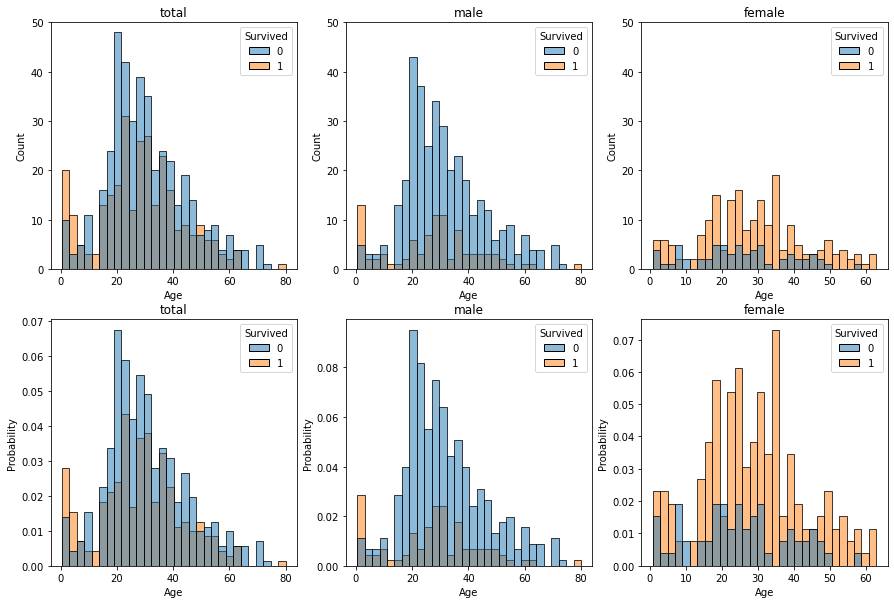

In [52]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.histplot(data=rawData, x='Age', hue='Survived', bins=30, ax=ax[0,0])
ax[0,0].set_title('total')
ax[0,0].set_ylim(0, 50)

sns.histplot(data=rawData[rawData['Sex']=='male'], x='Age', hue='Survived', bins=30, ax=ax[0,1])
ax[0,1].set_title('male')
ax[0,1].set_ylim(0, 50)

sns.histplot(data=rawData[rawData['Sex']=='female'], x='Age', hue='Survived', bins=30, ax=ax[0,2])
ax[0,2].set_title('female')
ax[0,2].set_ylim(0, 50)

sns.histplot(data=rawData, x='Age', hue='Survived', bins=30, stat='probability', ax=ax[1,0])
ax[1,0].set_title('total')

sns.histplot(data=rawData[rawData['Sex']=='male'], x='Age', hue='Survived', 
             bins=30, stat='probability', ax=ax[1,1])
ax[1,1].set_title('male')

sns.histplot(data=rawData[rawData['Sex']=='female'], x='Age', hue='Survived', 
             bins=30, stat='probability', ax=ax[1,2])
ax[1,2].set_title('female')

plt.show()

- 나이가 어린 승객은 성별과 상관없이 생존에 유리했음을 알 수 있다. 
- 여성승객은 나이와 상관없이 생존에 유리했음을 알 수 있다. 

## 이름분석

### 미들네임

In [54]:
rawData.Name.value_counts()

Sirayanian, Mr. Orsen                                    1
Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)    1
Jensen, Mr. Hans Peder                                   1
Moor, Master. Meier                                      1
Andrew, Mr. Edgardo Samuel                               1
                                                        ..
Hold, Mr. Stephen                                        1
Lindqvist, Mr. Eino William                              1
Calic, Mr. Jovo                                          1
Adahl, Mr. Mauritz Nils Martin                           1
Harris, Mr. Henry Birkhardt                              1
Name: Name, Length: 891, dtype: int64

In [64]:
rawData.Name.str.extract('([A-Za-z]+)\.').value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Don           1
Sir           1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Capt          1
dtype: int64

- Mr.      : 혼인여부와 상관없이 남성을 칭하는 용어
- Mrs.     : 결혼한 여성을 칭하는 용어
- Miss.    : 미혼여성을 칭하는 용어
- Ms.      : 혼인여부와 상관없이 여성을 칭하는 용어
- Dr.      : 성별과 상관없이 박사(의사)를 칭하는 용어
- Sir.     : 남성을 높여부르는 용어, 작위를 받은 남성
- Rev.     : 성직자에게 붙는 일반적인 칭호
- Capt.    : 대장, 함장
- Lady.    : 귀족 요성을 칭하는 용어
- Col.     : 대령, 신사를 뜻하는 경칭
- Countess : 백작
- Don.     : 존칭, 여성인 경우 Dona.
- Jonkheer. : 귀족
- Majer.   : 소령
- Master.  : 결혼하지 않은 남성(나이어린 남성을 높여쓰는 표현)
- Mlle.    : 마드모아젤, 미혼여성을 칭하는 프랑스 표현
- Mme.     : 마담, 기혼여성을 칭하는 프랑스 표현

In [65]:
name = rawData.Name.str.extract('([A-Za-z]+)\.')

In [67]:
name.rename(columns={0:'middle name'}, inplace=True)

In [70]:
name['Sex'] = rawData['Sex']

In [72]:
pd.crosstab(name['middle name'], name.Sex, margins=True).T

middle name,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [73]:
name['Survived'] = rawData['Survived']

In [74]:
name.groupby(['middle name']).Survived.mean()

middle name
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

### first name
- family name

In [75]:
rawData.Name.value_counts()

Sirayanian, Mr. Orsen                                    1
Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)    1
Jensen, Mr. Hans Peder                                   1
Moor, Master. Meier                                      1
Andrew, Mr. Edgardo Samuel                               1
                                                        ..
Hold, Mr. Stephen                                        1
Lindqvist, Mr. Eino William                              1
Calic, Mr. Jovo                                          1
Adahl, Mr. Mauritz Nils Martin                           1
Harris, Mr. Henry Birkhardt                              1
Name: Name, Length: 891, dtype: int64

In [77]:
rawData.Name.str.extract('([A-Za-z]+),').value_counts()

Andersson    9
Sage         7
Skoog        6
Goodwin      6
Johnson      6
            ..
Molson       1
Moen         1
Mockler      1
Mitkoff      1
Abbing       1
Length: 666, dtype: int64

### last name
- 분석에서 제외

In [101]:
rawData.Name.str.extract('(\. )([^0-9]+)')

,0,1
0,.,Owen Harris
1,.,John Bradley (Florence Briggs Thayer)
2,.,Laina
3,.,Jacques Heath (Lily May Peel)
4,.,William Henry
...,...,...
886,.,Juozas
887,.,Margaret Edith
888,.,"Catherine Helen ""Carrie"""
889,.,Karl Howell


In [100]:
rawData.loc[(rawData['SibSp'] >= 1) | (rawData['Parch'] >= 1)].sort_values(by='Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C


- 왜 그런지는 모르겠지만 첫번째 이름이 가족 이름으로 사용된다. 

## 가족 분석

In [123]:
fam = pd.DataFrame(rawData['SibSp'] + rawData['Parch'] + 1, columns=['count'])

In [124]:
fam['Survived'] = rawData['Survived']

In [114]:
fam['count'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

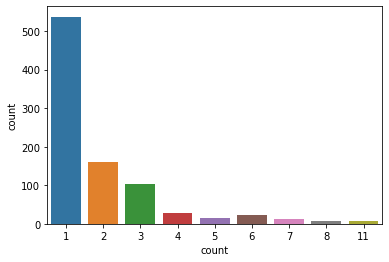

In [125]:
sns.countplot(x='count', data=fam)
plt.show()

In [128]:
pd.crosstab(fam['count'], fam['Survived'], margins=True).T

count,1,2,3,4,5,6,7,8,11,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


In [129]:
fam.groupby('count')['Survived'].mean()

count
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [130]:
fam['Pclass'] = rawData['Pclass']

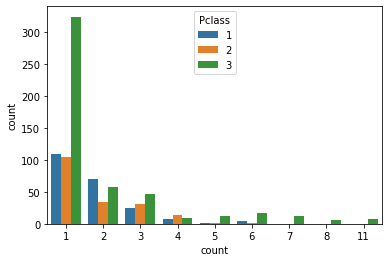

In [131]:
sns.countplot(x='count', hue='Pclass', data=fam)
plt.show()

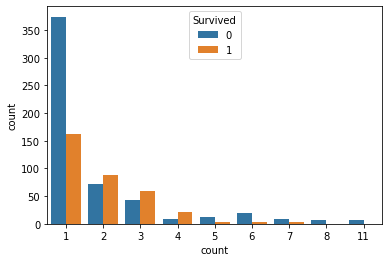

In [134]:
sns.countplot(x='count', hue='Survived', data=fam)
plt.show()

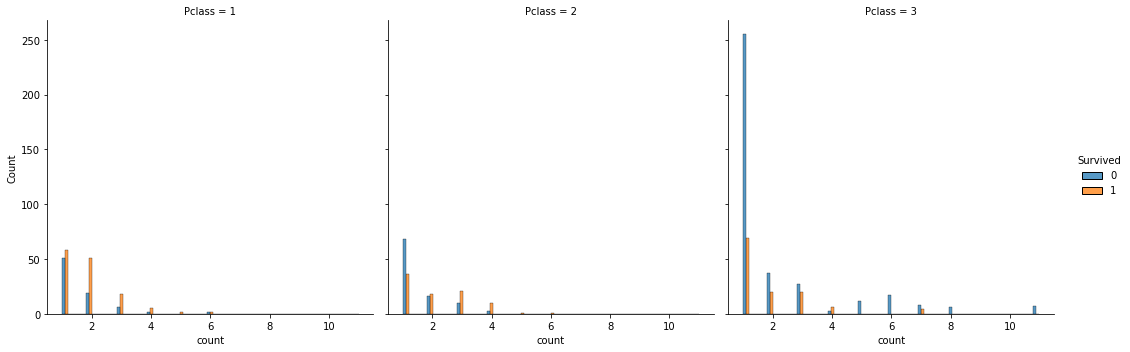

In [133]:
sns.displot(fam, x='count', hue='Survived', col='Pclass', multiple='dodge')
plt.show()

## 티켓 분석
- 같은 티켓번호를 가진 승객은 가족인가?
- 친구들끼리 같이 탄 경우

In [136]:
fam['ticket'] = rawData['Ticket']

In [137]:
fam['family name'] = rawData.Name.str.extract('([A-Za-z]+),')

In [138]:
fam

,count,Survived,Pclass,ticket,family name
0,2,0,3,A/5 21171,Braund
1,2,1,1,PC 17599,Cumings
2,1,1,3,STON/O2. 3101282,Heikkinen
3,2,1,1,113803,Futrelle
4,1,0,3,373450,Allen
...,...,...,...,...,...
886,1,0,2,211536,Montvila
887,1,1,1,112053,Graham
888,4,0,3,W./C. 6607,Johnston
889,1,1,1,111369,Behr
